In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [32]:

df = pd.read_excel(r"C:\Users\acer\Downloads\bets.xlsx")
df.loc[-1] = df.columns.tolist()
df.index = df.index + 1
df = df.sort_index()
df.drop([0], inplace = True) # Я удалила initialBankroll,т.к. это значение встречается только один раз. Если скажешь, решу по-другому 
df.columns = ['bet_id', 'metrics', 'coeffs']
df.head(20)


,bet_id,metrics,coeffs
1,1,odd,1.8
2,1,stake,150
3,1,result,lose
4,1,averageStake,150
5,1,averageOdds,1.8
6,1,netProfit,-150
7,1,roi,-15
8,1,turnover,150
9,1,betYield,-1
10,1,currentBankroll,850


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 3 columns):
bet_id     91 non-null int64
metrics    91 non-null object
coeffs     91 non-null object
dtypes: int64(1), object(2)
memory usage: 2.8+ KB


Для того, чтобы проще было данными оперировать в pandas, таблицу лучше развернуть горизонтально. Чтобы один ряд = одна ставка, столбцы - метрики ставки. Я подумала, что если проектировать СУБД для сбора данных, такая горизонтальная таблица ставок, привязанная к игроку, с добавленым datatime как временной ряд легко будет использоваться для дальнейшей аналитики.  

In [54]:
# Дальше будет порно. Жесткое пандас-порно =) 


df_copy = df.copy(deep=True)
dfs = []
#result = pd.concat(dfs, axis=1)
for i in range(1,9): # Девятка эта нехорошая, я все переделаю, когда буду знать в каком виде будут данные поступать
    new_df = df_copy[df['bet_id'].isin([i])]
    new_df.drop(new_df.columns[0], axis=1, inplace=True)
    new_df = new_df.set_index(['metrics'])
    new_df = new_df.T
    dfs.append(new_df.reset_index(drop=True))
    result = pd.concat(dfs, sort = False, axis = 0)
new_col = [i for i in range(1, len(result.index)+1)]
result.insert(0, 'bet_id', value=new_col)
result = result.set_index(['bet_id'])
result['downshift'] = np.nan
result
#result.to_excel(r"C:\Users\acer\Downloads\horiz_bets.xlsx", index=True)


metrics,odd,stake,result,averageStake,averageOdds,netProfit,roi,turnover,betYield,currentBankroll,downshift
bet_id,,,,,,,,,,,
1,1.8,150,lose,150,1.8,-150,-15,150,-1,850,NaN
2,1.4,180,lose,165,1.6,-330,-33,330,-1,670,NaN
3,2.2,140,win,156.667,1.8,-162,-16.2,470,-0.344681,838,NaN
4,3.4,120,lose,147.5,2.2,-282,-28.2,590,-0.477966,718,NaN
5,3.4,220,win,162,2.44,246,24.6,810,0.303704,1246,NaN
6,1.8,120,win,155,2.33333,342,34.2,930,0.367742,1342,NaN
7,4.1,100,lose,147.143,2.58571,242,24.2,1030,0.234951,1242,NaN
8,3.1,120,win,143.75,2.475,494,49.4,1150,0.429565,1494,NaN


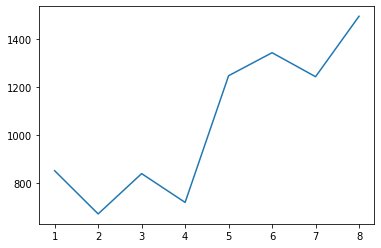

In [56]:
# Посмотриv график изменения currentBankroll Тут уже небольшая сложность с intialBankroll. Переделаю. 
plt.plot(result['currentBankroll'])
plt.show()

# Пауза. Вот на этом простом графике хорошо видно, что спуски(просадки) разные длины. 
#Можно посчитать только их и через это вывести коэффициент(дисперсию от средней линии?). 
#Можно взять разницу между просадкой - подъемом